In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
dataset = pd.read_csv("final.csv")
x = dataset.iloc[:, [7,8]].values
y = dataset.iloc[:, -1].values

In [ ]:
print(x)

[[  18 3000]
 [  20 4500]
 [  18 4200]
 [  18 6000]
 [  20 3200]
 [  18 7000]
 [  18 7200]
 [  20 5800]
 [  18 5900]
 [  20 4100]
 [  20 6900]
 [  20 6700]
 [  20 5700]
 [  18 5500]
 [  18 5300]
 [  18 5000]
 [  20 6600]
 [  18 6700]
 [  18 7100]
 [  20 4900]]


In [ ]:
print(y)

[1 2 1 1 2 1 1 2 1 2 2 2 2 1 1 1 2 1 1 2]


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [ ]:
print(x_train)

[[  18 6700]
 [  18 7200]
 [  18 5500]
 [  20 3200]
 [  18 4200]
 [  18 7000]
 [  18 5300]
 [  20 4100]
 [  20 5800]
 [  20 6600]
 [  20 6700]
 [  18 6000]
 [  18 3000]
 [  18 5000]
 [  20 5700]]


In [ ]:
print(x_test)

[[  18 7100]
 [  20 4500]
 [  20 4900]
 [  18 5900]
 [  20 6900]]


In [ ]:
print(y_train)

[1 1 1 2 1 1 1 2 2 2 2 1 1 1 2]


In [ ]:
print(y_test)

[1 2 2 1 2]


In [ ]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)

GaussianNB()

In [ ]:
y_pred = classifier.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[2 0]
 [0 3]]


<ipython-input-172-f60f6da09e5d>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j, 0], x_set[y_set==j, 1],


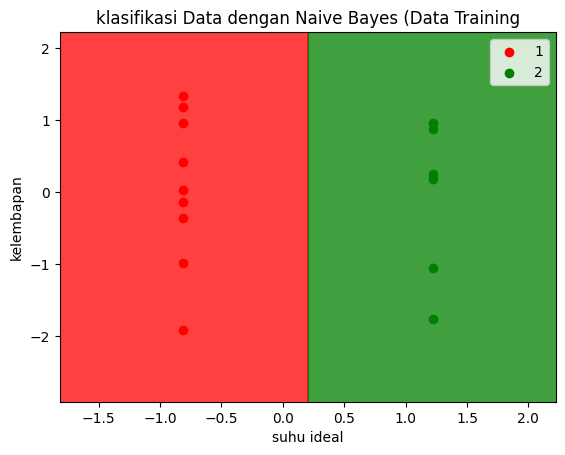

In [ ]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_train, y_train
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min()-1, stop = x_set[:, 0].max() + 1, step=0.01),
                     np.arange(start = x_set[:, 1].min()-1, stop = x_set[:, 0].max() + 1, step=0.01))
plt.contourf(x1,x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i , j in enumerate (np.unique(y_set)):
  plt.scatter(x_set[y_set == j, 0], x_set[y_set==j, 1],
              c = ListedColormap(('red','green'))(i), label = j)
plt.title('klasifikasi Data dengan Naive Bayes (Data Training')
plt.xlabel('suhu ideal')
plt.ylabel('kelembapan')
plt.legend()
plt.show()

<ipython-input-173-184febe6c3fb>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j, 0], x_set[y_set==j, 1],


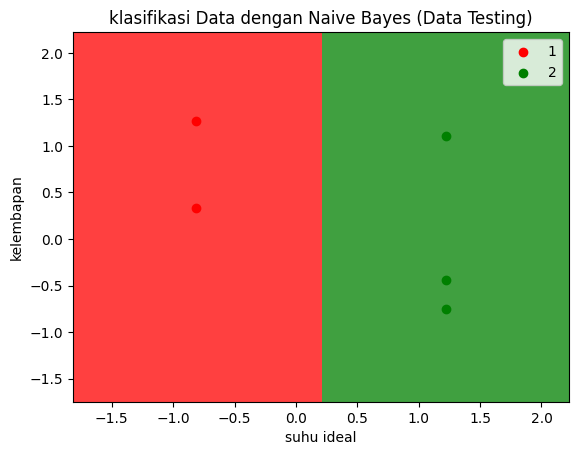

In [ ]:

from matplotlib.colors import ListedColormap
x_set, y_set = x_test, y_test
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min()-1, stop = x_set[:, 0].max() + 1, step=0.01),
                     np.arange(start = x_set[:, 1].min()-1, stop = x_set[:, 0].max() + 1, step=0.01))
plt.contourf(x1,x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i , j in enumerate (np.unique(y_set)):
  plt.scatter(x_set[y_set == j, 0], x_set[y_set==j, 1],
              c = ListedColormap(('red','green'))(i), label = j)
plt.title('klasifikasi Data dengan Naive Bayes (Data Testing)')
plt.xlabel('suhu ideal')
plt.ylabel('kelembapan')
plt.legend()
plt.show()